# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> AC209A Introduction to Data Science

## Final Project: Alzheimer's Diagnosis


**Harvard University**<br/>
**Fall 2023**<br/>
**Group Members**: Aida York, Sydney Levy, Niki Ekstrom, Soline Boussard, Michelle Hewson

---

### Import Libraries

In [4]:
#!pip install imblearn

In [5]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer, KNNImputer
from warnings import simplefilter

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from statsmodels.miscmodels.ordinal_model import OrderedModel 
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier


# Problem Statement

This project aims to understand how different factors affect whether a person develops dementia. The goal of our model is to predict the presence and severity of dementia based on training parameters such as gender, socioeconomic status, age, number of years of education, MMSE score, eTIV, nWBV, and ASF. These insights will help doctors, clinical researchers, and affected patients who want more information on the causes of dementia, and potentially predicting whether a person will develop dementia. 

# Data Loading and Cleaning

### Variables in the dataset

- Subject ID: Unique identifier for each person
- MRI ID: Unique identifier for each MRI session
- Group: Categorical variable for nondemented, demented, and converted
- Visit: Visit number
- MR Delay: Days since first visit
- Hand: Whether subject is left or right handed
- Age: Age
- EDUC: Years of Education
- SES: Socioeconomic Status / 1-5
- MMSE: Mini Mental State Examination
- CDR: Clinical Dementia Rating
- eTIV: Estimated total intracranial volume
- nWBV: Normalize Whole Brain Volume
- ASF: Atlas Scaling Factor

In [6]:
# Load the datasets
df = pd.read_csv("data/oasis_longitudinal.csv", index_col = 0)

# Start by exploring the dataset and its descriptive statistics
df.head()

,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Subject ID,,,,,,,,,,,,,,
OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [7]:
df.describe()
# Here, we notice that SES has 19 missing values, and MMSE has 3 missing values

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, OAS2_0001 to OAS2_0186
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MRI ID    373 non-null    object 
 1   Group     373 non-null    object 
 2   Visit     373 non-null    int64  
 3   MR Delay  373 non-null    int64  
 4   M/F       373 non-null    object 
 5   Hand      373 non-null    object 
 6   Age       373 non-null    int64  
 7   EDUC      373 non-null    int64  
 8   SES       354 non-null    float64
 9   MMSE      371 non-null    float64
 10  CDR       373 non-null    float64
 11  eTIV      373 non-null    int64  
 12  nWBV      373 non-null    float64
 13  ASF       373 non-null    float64
dtypes: float64(5), int64(5), object(4)
memory usage: 43.7+ KB


In [9]:
df.shape

(373, 14)

In [10]:
df[df['CDR']==2]

,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Subject ID,,,,,,,,,,,,,,
OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1.0,21.0,2.0,1503,0.66,1.168
OAS2_0120,OAS2_0120_MR2,Demented,2,595,F,R,78,14,3.0,15.0,2.0,1401,0.70,1.253
OAS2_0164,OAS2_0164_MR2,Demented,2,580,M,R,79,20,1.0,25.0,2.0,1710,0.76,1.026


## Preprocess the Data

We will start by preprocessing the data in order to facilitate visualization and correlations between different variables.

Start by dropping the predictor 'Hand', since everyone is right-handed and this will not give us any insight when predicting dementia. 

In [11]:
df = df.drop('Hand', axis=1)
df

,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Subject ID,,,,,,,,,,,,,
OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...
OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,61,13,2.0,30.0,0.0,1319,0.801,1.331


#### 1. Convert gender to binary variable
Start by changing male of female into a binary variable where male = 1 and female = 0*.

In [12]:
df = df.rename(columns={'M/F': 'Male'})
df['Male'] = (df['Male'] == 'M').astype(int)
df

,MRI ID,Group,Visit,MR Delay,Male,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Subject ID,,,,,,,,,,,,,
OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
OAS2_0002,OAS2_0002_MR1,Demented,1,0,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
OAS2_0002,OAS2_0002_MR2,Demented,2,560,1,76,12,NaN,28.0,0.5,1738,0.713,1.010
OAS2_0002,OAS2_0002_MR3,Demented,3,1895,1,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...
OAS2_0185,OAS2_0185_MR2,Demented,2,842,1,82,16,1.0,28.0,0.5,1693,0.694,1.037
OAS2_0185,OAS2_0185_MR3,Demented,3,2297,1,86,16,1.0,26.0,0.5,1688,0.675,1.040
OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,0,61,13,2.0,30.0,0.0,1319,0.801,1.331


#### 2. One-hot encoding
Create one-hot encoding based on the "Group" variable.

In [13]:
df_onehot = pd.get_dummies(df['Group'])
df_onehot.columns = ['converted', 'demented', 'non_demented']
df_onehot = df_onehot.astype(int)
df = pd.concat([df, df_onehot], axis=1)

df.head(10)

,MRI ID,Group,Visit,MR Delay,Male,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,converted,demented,non_demented
Subject ID,,,,,,,,,,,,,,,,
OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883,0,0,1
OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876,0,0,1
OAS2_0002,OAS2_0002_MR1,Demented,1,0,1,75,12,NaN,23.0,0.5,1678,0.736,1.046,0,1,0
OAS2_0002,OAS2_0002_MR2,Demented,2,560,1,76,12,NaN,28.0,0.5,1738,0.713,1.010,0,1,0
OAS2_0002,OAS2_0002_MR3,Demented,3,1895,1,80,12,NaN,22.0,0.5,1698,0.701,1.034,0,1,0
OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444,0,0,1
OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,0,90,18,3.0,27.0,0.0,1200,0.718,1.462,0,0,1
OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039,0,0,1
OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,1,83,12,4.0,29.0,0.5,1701,0.711,1.032,0,0,1


#### 3. Grouping
Group the subjects by their demented class, which shows whether each person is demented, non_demented or converted.

As can be seen from the data, each subject had several visits and scans, meaning each subject corresponds to several rows in the dataframe.  
Therefore, we create a nested list that groups the data by Subject ID. This means that each entry in the nested list corresponds to one person, and that list contains the information about each visit and scan that person made.

This will make it easier to analyze the data later on, since we will be able to extract information on a personal level.
For example, if we don't group by subject, a histogram of the ages of the subjects will not be accurate since some people's age will be listed several times.

In [14]:
nested_list = [group.values for name, group in df.groupby('Subject ID')]

print(nested_list[:3])

[array([['OAS2_0001_MR1', 'Nondemented', 1, 0, 1, 87, 14, 2.0, 27.0, 0.0,
        1987, 0.696, 0.883, 0, 0, 1],
       ['OAS2_0001_MR2', 'Nondemented', 2, 457, 1, 88, 14, 2.0, 30.0,
        0.0, 2004, 0.681, 0.876, 0, 0, 1]], dtype=object), array([['OAS2_0002_MR1', 'Demented', 1, 0, 1, 75, 12, nan, 23.0, 0.5,
        1678, 0.736, 1.046, 0, 1, 0],
       ['OAS2_0002_MR2', 'Demented', 2, 560, 1, 76, 12, nan, 28.0, 0.5,
        1738, 0.713, 1.01, 0, 1, 0],
       ['OAS2_0002_MR3', 'Demented', 3, 1895, 1, 80, 12, nan, 22.0, 0.5,
        1698, 0.701, 1.034, 0, 1, 0]], dtype=object), array([['OAS2_0004_MR1', 'Nondemented', 1, 0, 0, 88, 18, 3.0, 28.0, 0.0,
        1215, 0.71, 1.444, 0, 0, 1],
       ['OAS2_0004_MR2', 'Nondemented', 2, 538, 0, 90, 18, 3.0, 27.0,
        0.0, 1200, 0.718, 1.462, 0, 0, 1]], dtype=object)]


## Explore and Visualize Data

#### 1. Pairplot
- Start by separating out the continuous variables in order to create a pairplot

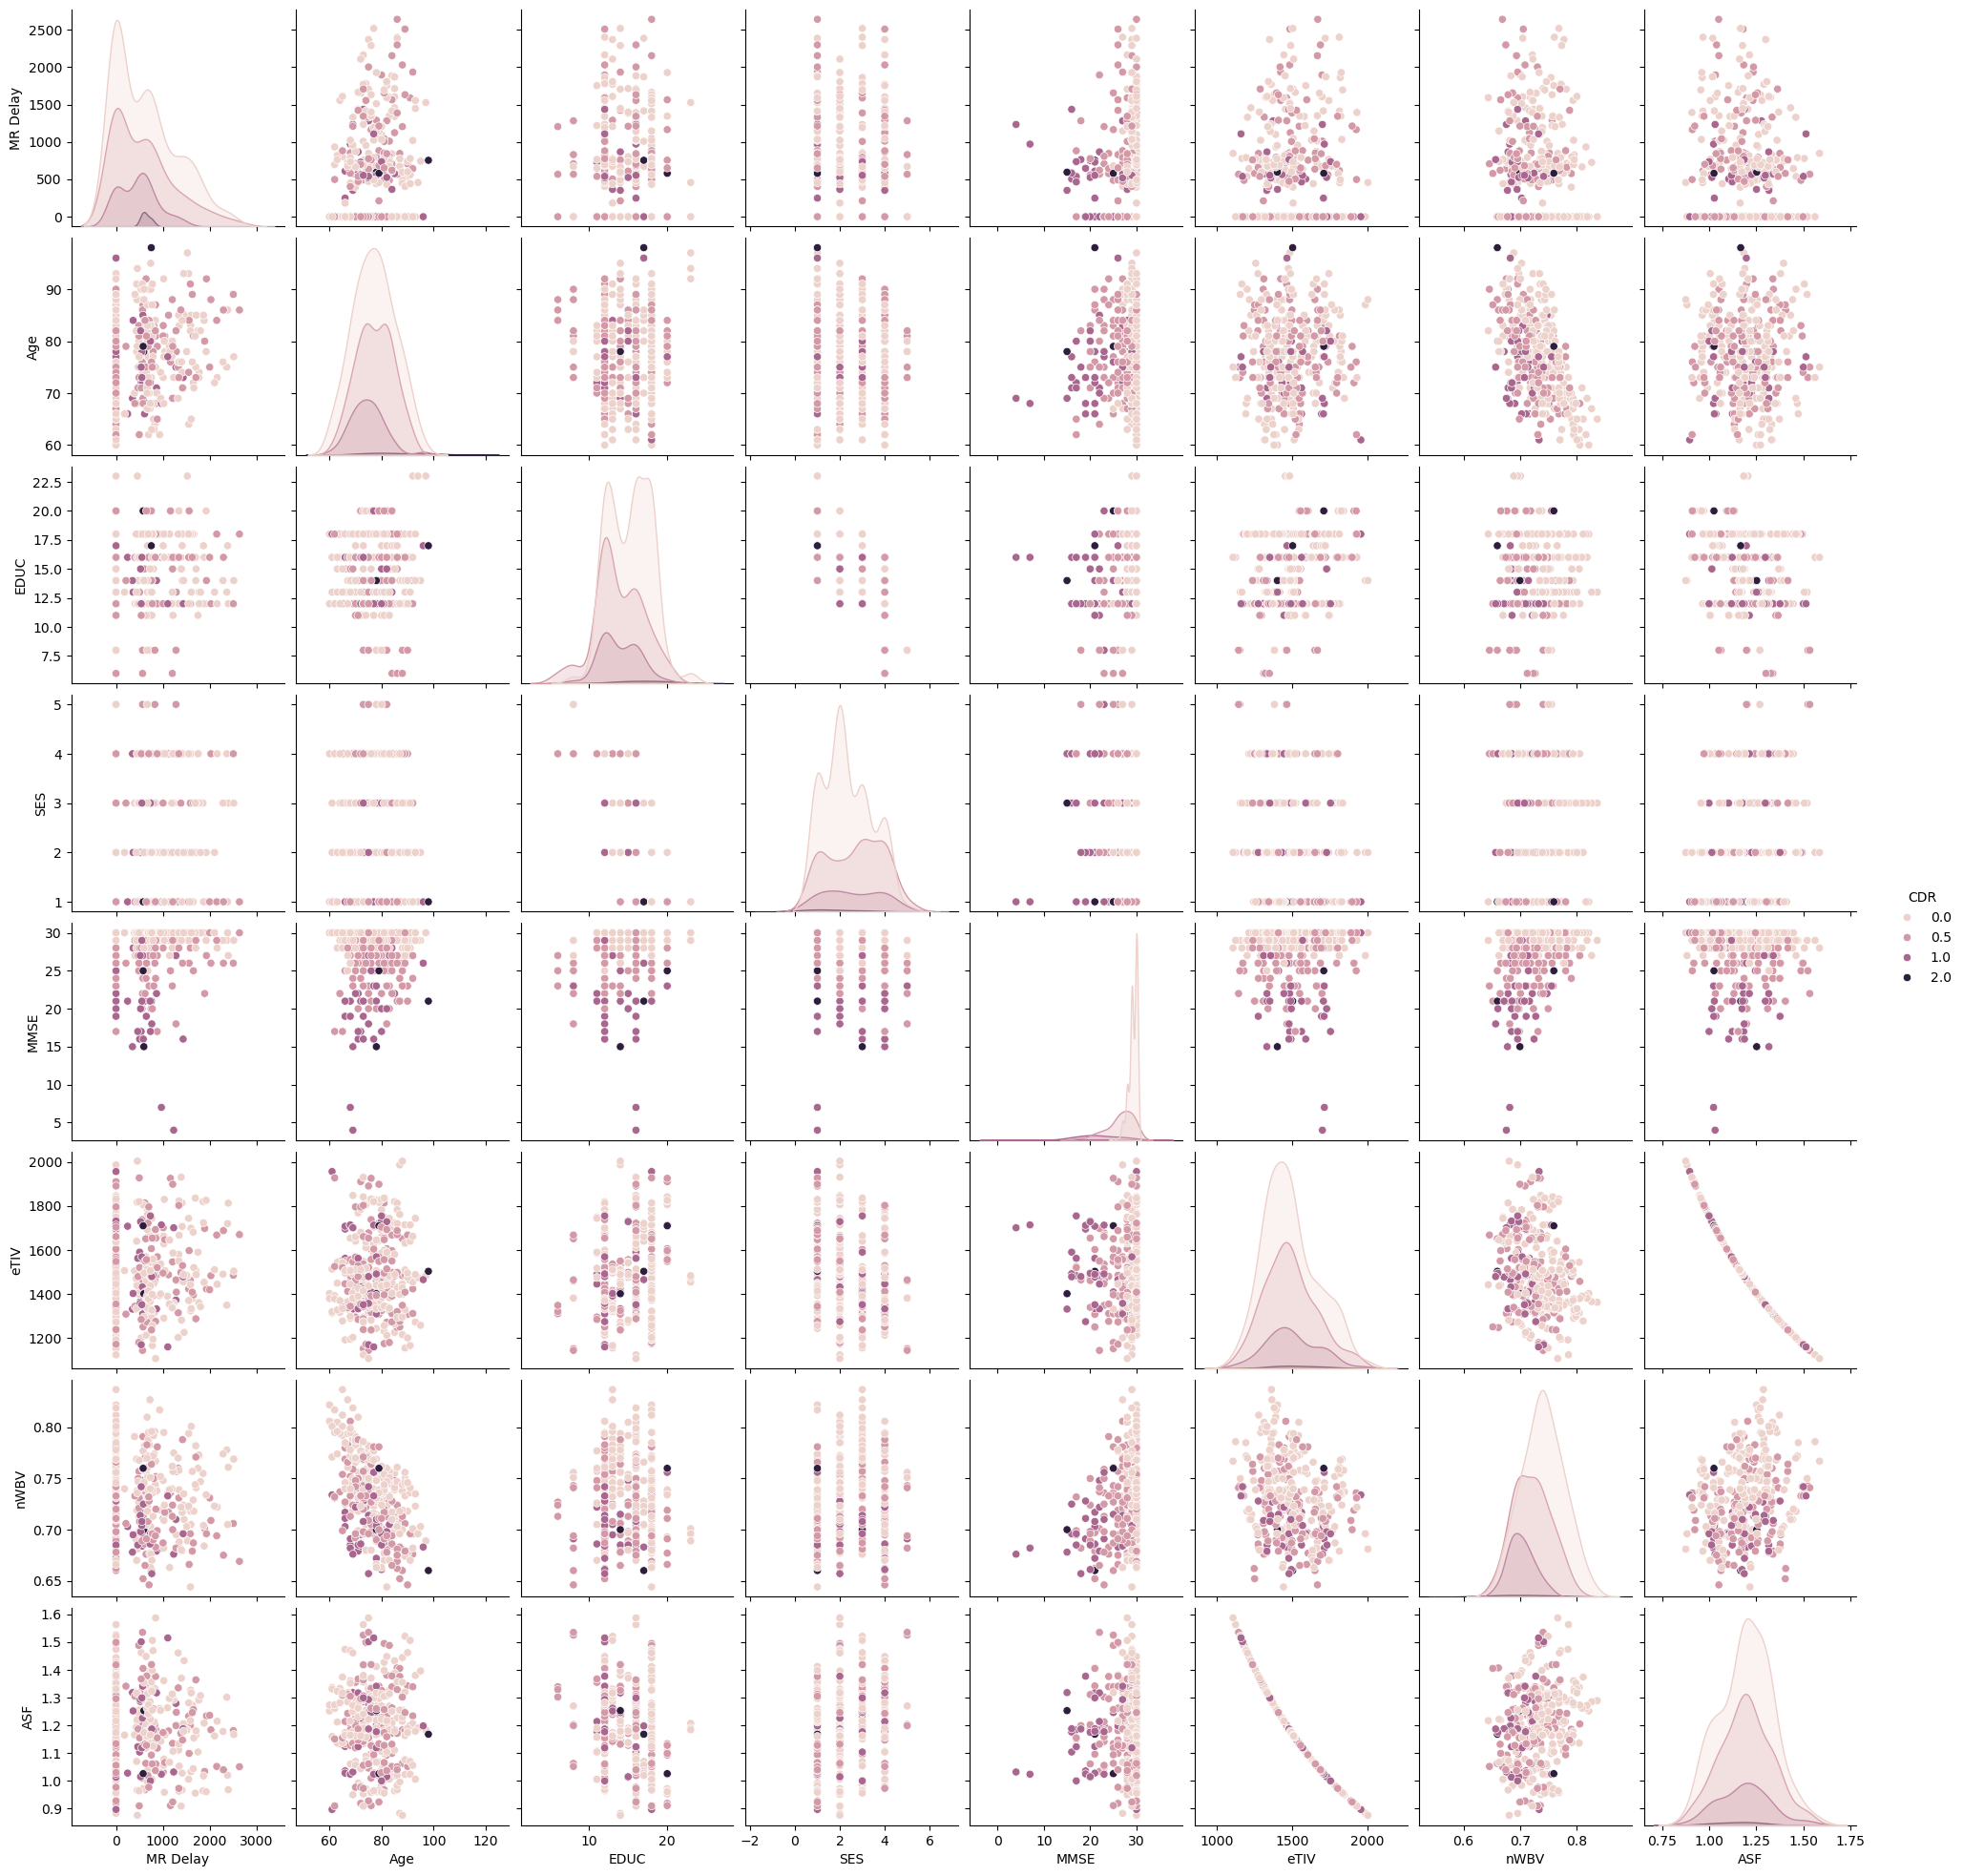

In [15]:
simplefilter('ignore', category=FutureWarning)
continuous = ['MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV' ,'ASF', 'CDR']
df = df.reset_index()

sns.pairplot(df[continuous], hue='CDR');

By looking at the diagonal plots, we can see that there is a lot of overlap for the distirbutions of the different CDR values, meaning there could be a lot of characteristics that overlap between subjects with varying CDR values. In the remaining scatterplots, we don't see much separation between the different CDR values. 

#### 2. Correlation Matrix
- We plotted the absolute value of the correlation between the numeric variables
- We didn't include Subject ID or MRI ID since these are unique identifiers of each subject and should not be predictors of dementia.

In [16]:
df.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'Male', 'Age',
       'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'converted',
       'demented', 'non_demented'],
      dtype='object')

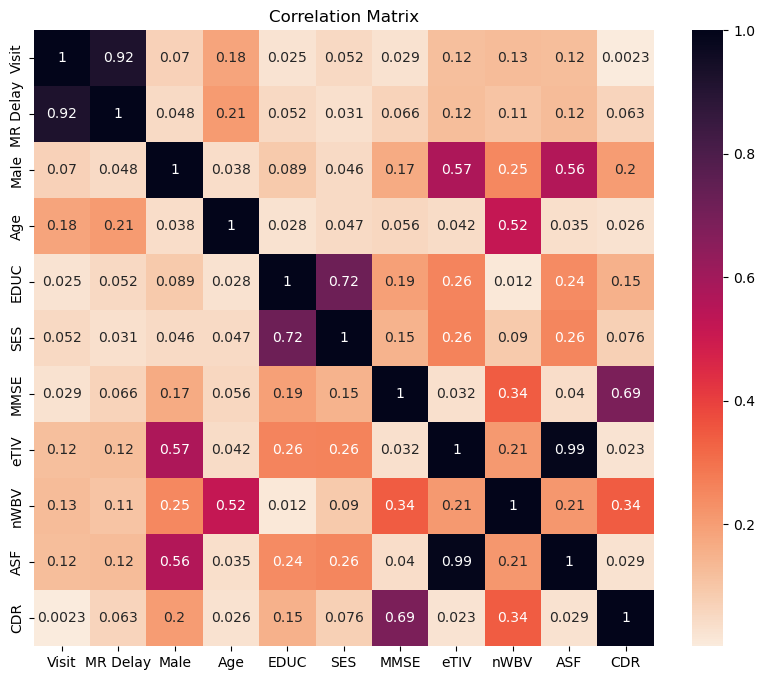

In [17]:
plt.figure(figsize= (10,8))
corr_cols = df[[ 'Visit', 'MR Delay', 'Male', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF','CDR']].copy()
sns.heatmap(np.abs(corr_cols.corr()), annot=True, cmap="rocket_r");
plt.title('Correlation Matrix');

Looking at the correlation matrix, we will not use Visit or MR Delay for predicting dementia, since they have a very low correlation with CDR. Additionally, these variables are not characteristics of the subject and therefore should not have an influence on whether a person develops dementia.

The variables with the strongest correlation to CDR are MMSE, nWBV, Male, and EDUC. Therefore, we will focus on these varibales for further exploration.

Depending on the style of visualization, we will use either "Group" or "CDR". These variables both correspond to a dementia rating, and roughly translate to the same idea. 

In [18]:
df.groupby(['Group', 'CDR']).size()

Group        CDR
Converted    0.0     18
             0.5     19
Demented     0.5    102
             1.0     41
             2.0      3
Nondemented  0.0    188
             0.5      2
dtype: int64

#### 3. Boxplot of continuous variables vs. CDR

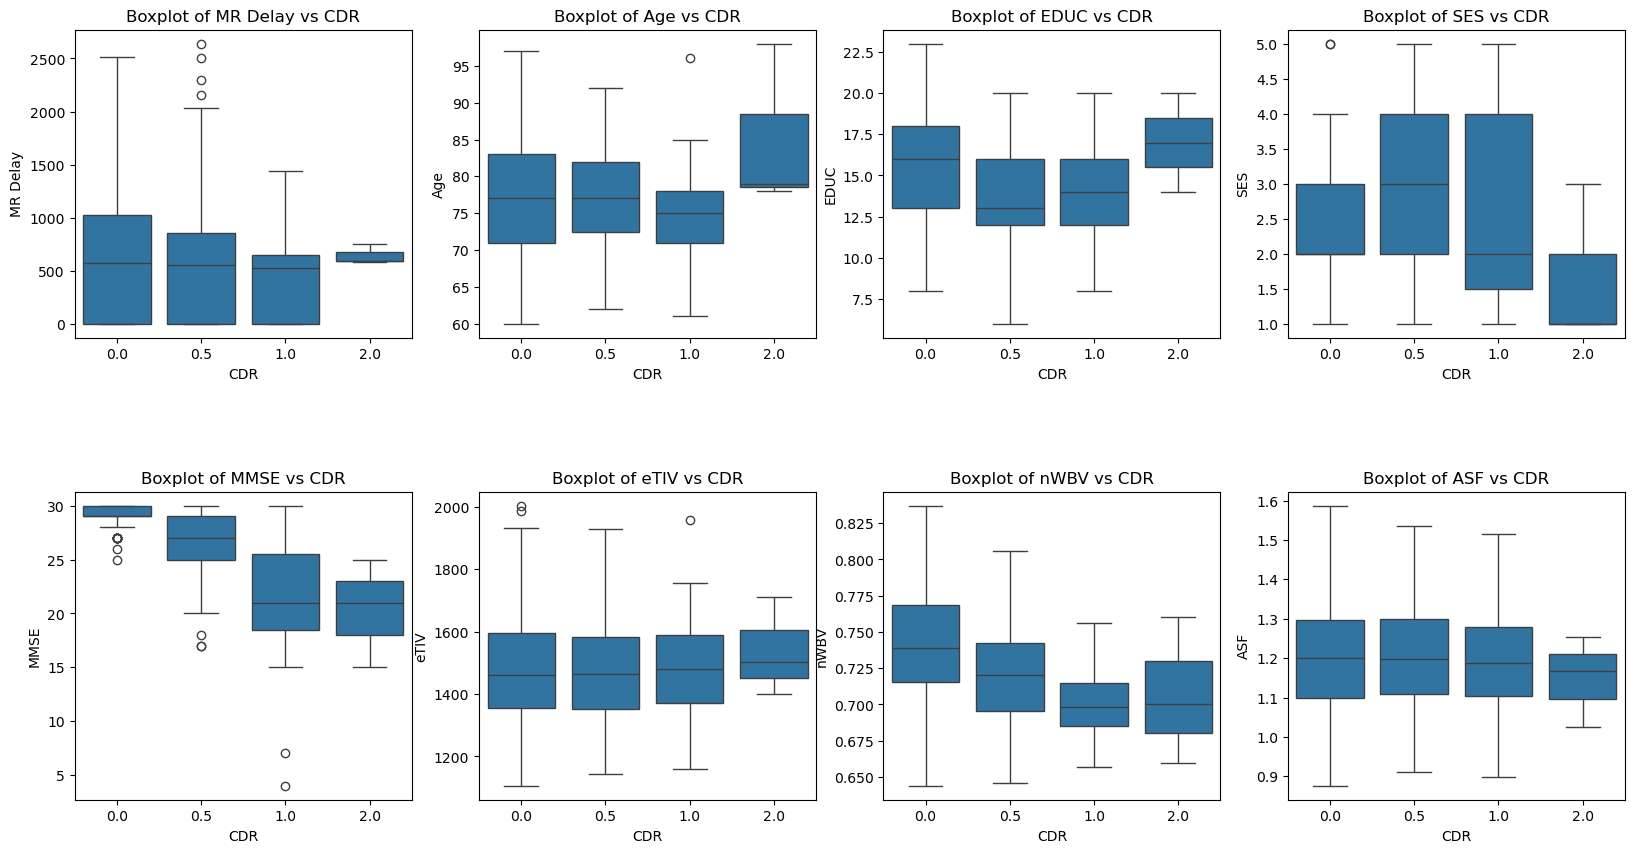

In [19]:
non_CDR_cont = ['MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV' ,'ASF']

# Calculate the number of rows needed based on the number of continuous variables
num_rows = (len(non_CDR_cont) + 3) // 4  # Ceiling division for a 4-column grid

# Create subplots for each continuous variable in a 4-column grid
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5 * num_rows))
fig.subplots_adjust(hspace=0.5)

# Iterate through continuous variables and create boxplots
for i, var in enumerate(non_CDR_cont):
    row = i // 4
    col = i % 4
    sns.boxplot(x=df['CDR'], y=df[var], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {var} vs CDR')

# Remove empty subplots, if any
for i in range(len(non_CDR_cont), num_rows * 4):
    fig.delaxes(axes.flatten()[i])

The box plots above demonstrate the distribution of continuous variables across CDR. MMSE has the greatest difference in distribution across levels of CDR, where higher levels of MMSE are associated with a CDR of 0 and lower levels of MMSE are associated with CDR levels 1 and 2. There are a couple of potential outliers in the MMSE, MR delay, eTIV, Age, and SES. 

#### 4. Relationship between gender and CDR

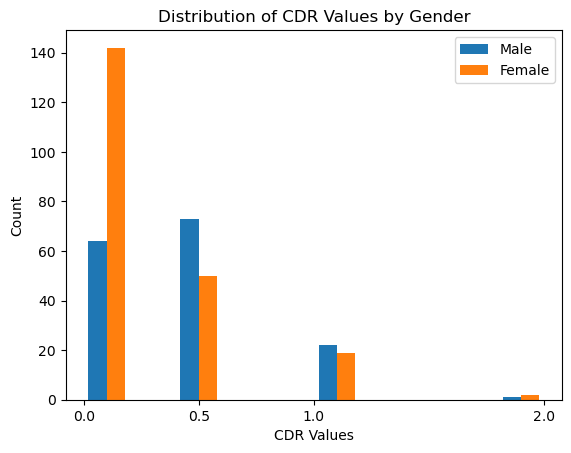

In [20]:
male = df[df['Male']==1]['CDR']
female = df[df['Male']==0]['CDR']

plt.hist([male.values, female.values], label=['Male', 'Female'])
plt.legend()
plt.xticks([0, 0.5, 1, 2]);
plt.xlabel('CDR Values')
plt.ylabel('Count')
plt.title('Distribution of CDR Values by Gender');

Findings from the plot:
- There are more females than males that have a CDR value of 0
- There are more males than females that have a CDR value of 0.5 
- There are slightly more males than females that have a CDR value of 1.0
- There are very few people with a CDR rating of 2.0
- Overall, there are more females than males in the dataset

#### 5. Relationship between MMSE score and CDR

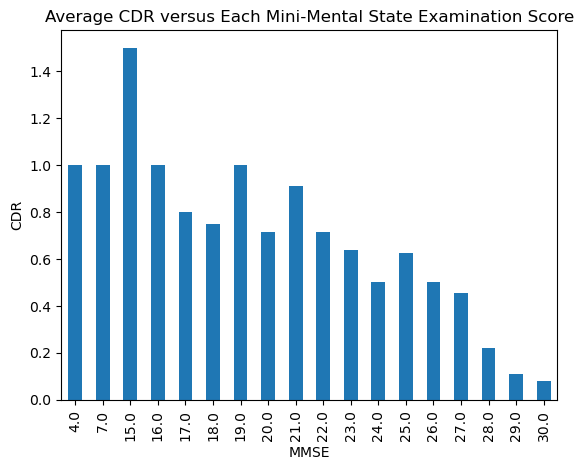

In [21]:
df.groupby('MMSE'). agg({'CDR': 'mean'}).plot.bar(legend=False);
plt.ylabel('CDR');
plt.title('Average CDR versus Each Mini-Mental State Examination Score');

We can see a negative correlation between MMSE score and CDR. 

#### 6. Relationship between Age and CDR

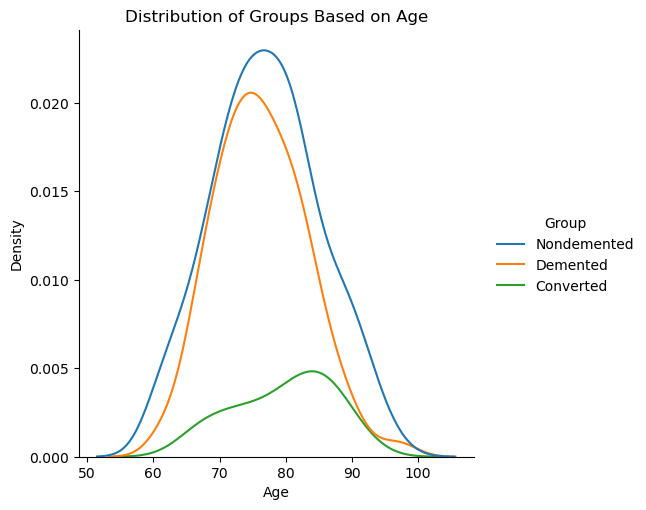

In [22]:
sns.displot(data=df, x='Age', hue='Group', kind="kde");
plt.title('Distribution of Groups Based on Age');

We can see that there is a weak correlation between age and whether a person is demented or not. It appears that those who are demented are slightly younger than those who are nondemented and converted. This could be due to the fact that those who have dementia tend to die sooner than those without dementia. 

#### 7. Relationship between Education and CDR

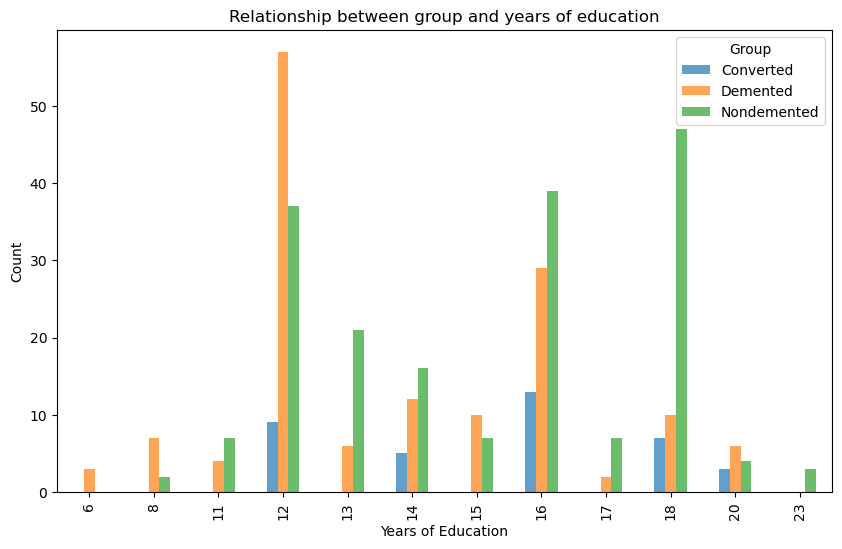

In [23]:
pivot_table = df.pivot_table(index='EDUC', columns='Group', aggfunc='size', fill_value=0)

pivot_table.plot(kind='bar', alpha=0.7, figsize=(10, 6))
plt.xlabel('Years of Education')
plt.ylabel('Count')
plt.title('Relationship between group and years of education');

12 years to education corresponds to a high school graduate. Those who only graduated from high school are more likely to be demented than nondemented, whereas those with a college degree (16 years of education) are more likely to be nondemented than demented. This relationship holds especially true if the person received a graduate degree (18 years of education). 

#### 8. Relationship between nWBV and CDR

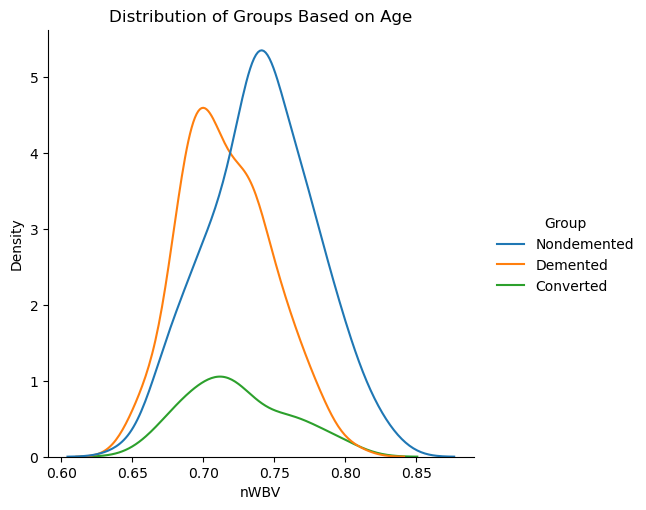

In [24]:
sns.displot(data=df, x='nWBV', hue='Group', kind="kde");
plt.title('Distribution of Groups Based on Age');

Those who are demented and converted tend to have lower nWBV values than those who are nondemented. 

#### 9. Relationship between group and CDR

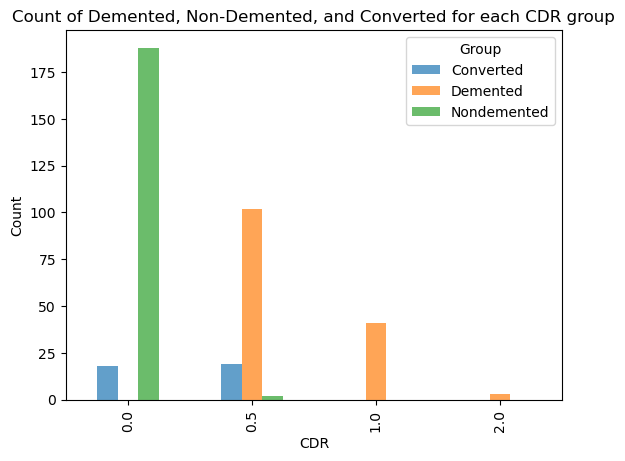

In [25]:
pivot_table = df.pivot_table(index='CDR', columns='Group', aggfunc='size', fill_value=0)

pivot_table.plot(kind='bar', alpha = 0.7)
plt.xlabel('CDR')
plt.ylabel('Count')
plt.title('Count of Demented, Non-Demented, and Converted for each CDR group');

There is a class imbalance in our outcome variable, CDR. These classifications roughly correspond to Nondemented (0) through Demented (1.0). Only 3 scans were given a score of 2.0, which represented a more severe dementia. We plan to re-score those given a 2.0 as a 1.0 because we are interested in the presence of dementia more so than the severity of the dementia. One way we plan on handling this class imbalance is by using the binary variable we created for either ‘demented’ or not ‘demented.’ Additionally, we can use oversampling to have a more even split between the CDR values.

# Baseline/Naive Model


### Handle Missing Values


In [26]:
df.isna().sum()

Subject ID       0
MRI ID           0
Group            0
Visit            0
MR Delay         0
Male             0
Age              0
EDUC             0
SES             19
MMSE             2
CDR              0
eTIV             0
nWBV             0
ASF              0
converted        0
demented         0
non_demented     0
dtype: int64

In [27]:
# Drop rows with missing MMSE values as they account for less than 5% of the data
df = df.dropna(subset=['MMSE'])

In [28]:
# Use KNNImputer to impute missing values for SES because the missing values account for more than 5% of the data
imputer = KNNImputer(n_neighbors=4)
SES_imputed = imputer.fit_transform(df[['SES']])
df['SES'] = SES_imputed.astype(int)

In [29]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Male,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,converted,demented,non_demented
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,1,87,14,2,27.0,0.0,1987,0.696,0.883,0,0,1
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,1,88,14,2,30.0,0.0,2004,0.681,0.876,0,0,1
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,1,75,12,2,23.0,0.5,1678,0.736,1.046,0,1,0
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,1,76,12,2,28.0,0.5,1738,0.713,1.010,0,1,0
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,1,80,12,2,22.0,0.5,1698,0.701,1.034,0,1,0


### Train-test split


In [30]:
nested_list = [group.values for name, group in df.groupby('Subject ID')]
baseline_predictors = ['Male', 'Age','EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']
df[baseline_predictors + ['demented']].head()

,Male,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,demented
0,1,87,14,2,27.0,1987,0.696,0.883,0
1,1,88,14,2,30.0,2004,0.681,0.876,0
2,1,75,12,2,23.0,1678,0.736,1.046,1
3,1,76,12,2,28.0,1738,0.713,1.010,1
4,1,80,12,2,22.0,1698,0.701,1.034,1


In [31]:
#We decided to increase the test size by 0.1 since our dataset is so small 
X_train_mri, X_test_mri, y_train_mri, y_test_mri = train_test_split(df[baseline_predictors], df['demented'], test_size=0.3, random_state=42)

In [32]:
#Scale the data so larger coefficents don't skew the models
scaler = StandardScaler()
X_train_scaled_mri = scaler.fit_transform(X_train_mri)
X_test_scaled_mri = scaler.transform(X_test_mri)

In [33]:
X_train_mri.shape, y_train_mri.shape, X_test_mri.shape, y_test_mri.shape

((259, 8), (259,), (112, 8), (112,))

In [34]:
#Observe the class inbalance
df['demented'].value_counts()

demented
0    227
1    144
Name: count, dtype: int64

### Fit the Baseline Logistic Regression Model and Display Results (MRI-level Data)


In [35]:
#Fit baseline model using logistic regression with mri scan data
baseline_model = LogisticRegression(random_state = 42, max_iter = 1000, penalty = 'none').fit(X_train_scaled_mri, y_train_mri)

#calculate the accuracys
baseline_train_acc = baseline_model.score(X_train_scaled_mri, y_train_mri)
baseline_test_acc= baseline_model.score(X_test_scaled_mri, y_test_mri)

#calculate the f1 scores because of data inbalance 
y_pred_train_mri = baseline_model.predict(X_train_scaled_mri)
y_pred_test_mri = baseline_model.predict(X_test_scaled_mri)
f1_train= f1_score(y_train_mri, y_pred_train_mri)
f1_test = f1_score(y_test_mri, y_pred_test_mri)

In [36]:
#create a dataframe that will hold all the model results 
MODELS_mri = pd.DataFrame([['Logistic Regression Naive', baseline_train_acc, baseline_test_acc, f1_train, f1_test]],  columns = ['Model', 'Train Accuracy Score', 'Test Accuracy Score', 'F1 Train Score', 'F1 Test Score'])
display(MODELS_mri)

,Model,Train Accuracy Score,Test Accuracy Score,F1 Train Score,F1 Test Score
0,Logistic Regression Naive,0.872587,0.821429,0.81768,0.787234


### Create train-test-split for Subject-level data, fit the Model and Display Results (Subject-level Data)


Now we group by patient ids and only keep their last visit. We will run our models on both datasets to evaluate the difference between subject level and scan level data.


In [37]:
#create the groups by subject id and keep only their last visit
subject_last_scan = [nested[-1] for nested in nested_list]
subject_level_df = pd.DataFrame(subject_last_scan, columns=df.columns)

#train test split with a larger test size to adjust for the smaller dataset. We also stratified to ensure that we have the same amount of demented in each split.
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(subject_level_df[baseline_predictors], subject_level_df['demented'], test_size=0.3, random_state=41, stratify=subject_level_df['demented'])

#Scale the data
scaler = StandardScaler()
X_train_scaled_sub = scaler.fit_transform(X_train_sub)
X_test_scaled_sub = scaler.transform(X_test_sub)
baseline_model_subject = LogisticRegression(random_state = 42, max_iter = 1000, penalty = 'none').fit(X_train_scaled_sub, y_train_sub)


print("Accuracy on the Training Set", baseline_model_subject.score(X_train_scaled_sub, y_train_sub))
print("Accuracy on the Testing Set", baseline_model_subject.score(X_test_scaled_sub, y_test_sub))
y_pred_train_sub = baseline_model_subject.predict(X_train_scaled_sub)
y_pred_test_sub = baseline_model_subject.predict(X_test_scaled_sub)

print("F1 Score Train", f1_score(y_train_sub, y_pred_train_sub))
print("F1 Score Test", f1_score(y_test_sub, y_pred_test_sub))

print("\nCoefficient Values")
for i, coef in enumerate(baseline_model_subject.coef_[0]):
    print(baseline_predictors[i], coef)

Accuracy on the Training Set 0.8666666666666667
Accuracy on the Testing Set 0.7777777777777778
F1 Score Train 0.8444444444444444
F1 Score Test 0.7500000000000001

Coefficient Values
Male 1.550351199776645
Age -1.5082548616482225
EDUC -0.7727063534109221
SES -0.10538207594857267
MMSE -3.6879736754140535
eTIV 1.4133829177189916
nWBV -0.6775429158151541
ASF 2.0095523963251183


#### Create a dataframe to store the train and test accuracies of all the models at subject level for future comparison.

In [38]:
MODELS = pd.DataFrame([['Logistic Regression Naive', baseline_model_subject.score(X_train_scaled_sub, y_train_sub), baseline_model_subject.score(X_test_scaled_sub, y_test_sub), f1_score(y_train_sub, y_pred_train_sub), f1_score(y_test_sub, y_pred_test_sub)]],  columns = ['Model', 'Train Accuracy Score', 'Test Accuracy Score', 'F1 Train Score', 'F1 Test Score'])
display(MODELS)

,Model,Train Accuracy Score,Test Accuracy Score,F1 Train Score,F1 Test Score
0,Logistic Regression Naive,0.866667,0.777778,0.844444,0.75


### Confusion Matrix (MRI-level)

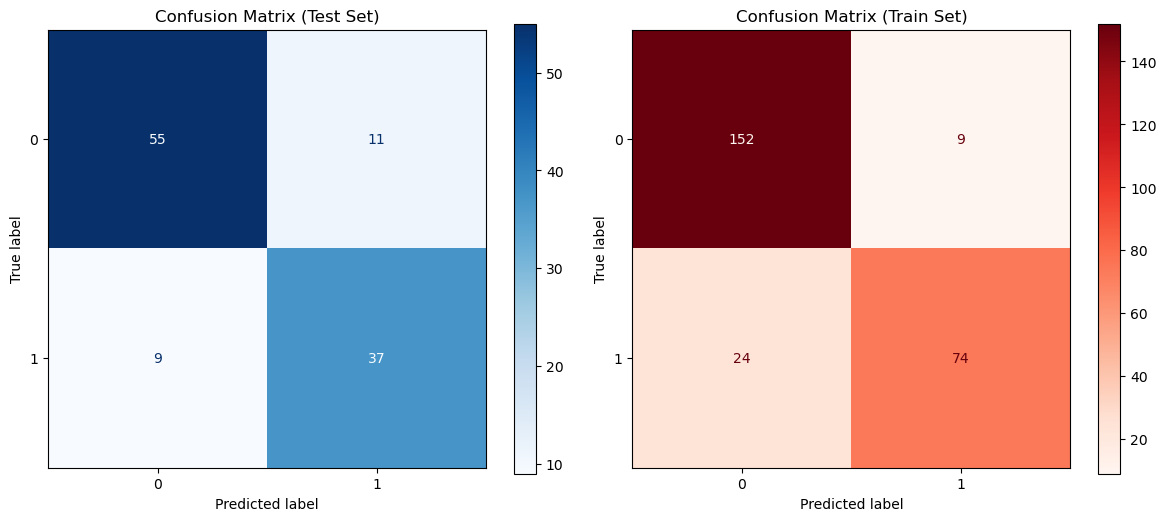

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Test Confusion Matrix
cm_test = confusion_matrix(y_test_mri, y_pred_test_mri, labels=baseline_model.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=baseline_model.classes_)
disp_test.plot(cmap='Blues', ax=axes[0], values_format='.0f')
axes[0].set_title('Confusion Matrix (Test Set)')

# Train Confusion Matrix
cm_train = confusion_matrix(y_train_mri, y_pred_train_mri, labels=baseline_model.classes_)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=baseline_model.classes_)
disp_train.plot(cmap='Reds', ax=axes[1], values_format='.0f')
axes[1].set_title('Confusion Matrix (Train Set)')

plt.tight_layout()
plt.show()

These confusion matrix demonstrate that our baseline model is generally predicted the true classes. Additionally, these matricies highlight the small size of the train and test data. Because our data is so small, the accuracy and predictions have high variability.

### Confusion Matrix (Subject-level)

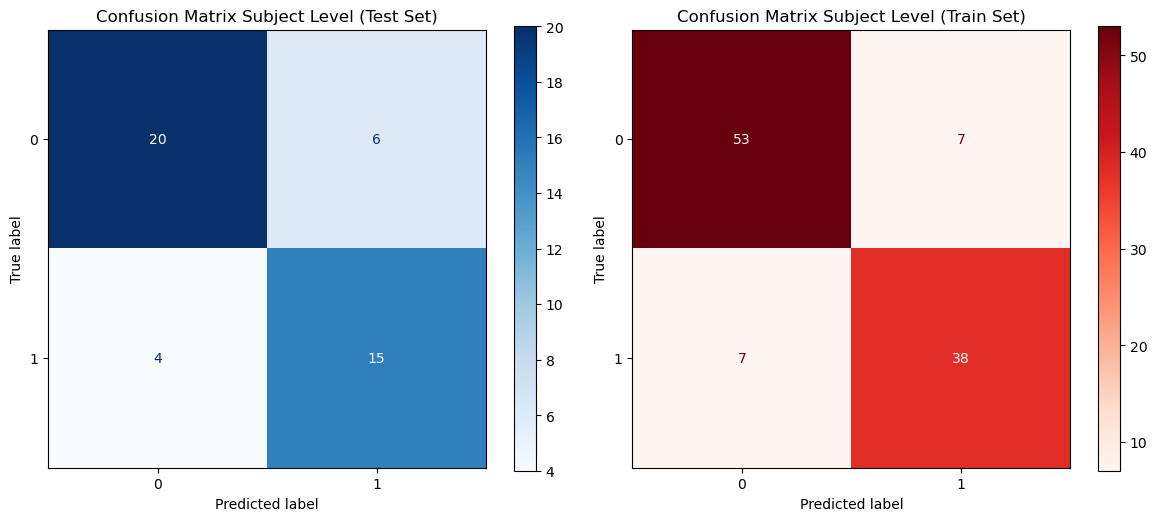

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Test Confusion Matrix
cm_test_sub = confusion_matrix(y_test_sub, y_pred_test_sub, labels=baseline_model_subject.classes_)
disp_test_sub = ConfusionMatrixDisplay(confusion_matrix=cm_test_sub, display_labels=baseline_model_subject.classes_)
disp_test_sub.plot(cmap='Blues', ax=axes[0], values_format='.0f')
axes[0].set_title('Confusion Matrix Subject Level (Test Set)')

# Train Confusion Matrix
cm_train_sub = confusion_matrix(y_train_sub, y_pred_train_sub, labels=baseline_model_subject.classes_)
disp_train_sub = ConfusionMatrixDisplay(confusion_matrix=cm_train_sub, display_labels=baseline_model_subject.classes_)
disp_train_sub.plot(cmap='Reds', ax=axes[1], values_format='.0f')
axes[1].set_title('Confusion Matrix Subject Level (Train Set)')

plt.tight_layout()
plt.show()

### Findings for Naive Model

For our baseline model, we created 2 Logistic Regressions with the binary variable 'demented' as the outcome and the variables 'Male', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF' as our predictors. 

The data for the first logistic model (MRI-level) have one row per MRI scan so those with more scans are weighted more heavily in the dataset. This logistic model achieved a train accuracy of ~83%, test accuracy of ~87%, train F1-score of ~76%, and test F1-score of ~84%. 

The data for the second logistic model (Subject-level) have one row per subject, where we selected the most recent scan for each subject to avoid over-weighting subjects with more scans. This logistic model achieved a train accuracy of ~84%, test accuracy of ~77%, train F1-score of ~83%, and test F1-score of ~70%. We can see that this model is likely overfitting to the training set as the training accuracy and F1-score are much higher on the training set as compared to the testing set. 

Overall, the Subject-level model performed worse than the MRI-level model although we would prefer our model to have subject-level interpretations and not rely on having a subject with multiple scans. Thus, for future / improved models we will focus on the subject-level dataset. 

Our findings for both models suggest that the predictors with the largest coefficient values are: Male, nWBV, and ASF. For future models, we will scale all of the predictors so we can better understand the feature importance of the models.


For our final model we will create both a Random Forest Classifier and an ordinal regression model. We believe that the Random Forest Model will be able to achieve higher accuracy and F1 scores than the simple logistic model by utilizing diverse decision trees based on bootstrapped samples and aggregating the predictions. Further, an ordinal regression model (which we have not seen in class) will allow us to predict those that have a 'converted' outcome as opposed to simply 'demented' or not 'demented'.

# Exploring Different Models


## First Model: Logistic Regression with Tuning

For our logistic regression model with regularization, we will scale our predictors and use 5-fold cross validation to find the best lasso regularization parameter for this model. 
For all our remaining models except for XGBoost we will balance the class weight.

In [41]:
# Fit a logistic regression model with different options for the lambda hyperparameter
Cs = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
max_iter = 1000
penalty = "l1"
solver = "liblinear"

logistic_lasso = LogisticRegressionCV(Cs=Cs,
                                   cv=5,
                                   penalty=penalty,
                                   max_iter=max_iter,
                                   solver=solver,
                                   random_state=42, class_weight='balanced'
)

#Fit to training data at subject level
logistic_lasso = logistic_lasso.fit(X_train_scaled_sub, y_train_sub)

#Predict and compute f1 scores
y_pred_train_logistic_lasso = logistic_lasso.predict(X_train_scaled_sub)
y_pred_test_logistic_lasso = logistic_lasso.predict(X_test_scaled_sub)
logistic_lasso_train_f1 = f1_score(y_train_sub, y_pred_train_logistic_lasso)
logistic_lasso_test_f1 = f1_score(y_test_sub, y_pred_test_logistic_lasso)

#calculate accuracy
logistic_lasso_train_acc = logistic_lasso.score(X_train_scaled_sub, y_train_sub) 
logistic_lasso_test_acc = logistic_lasso.score(X_test_scaled_sub, y_test_sub)


In [42]:
#append results to dataframe 
new_row_data = {
    'Model': 'Logistic Regression Lasso Regularized',
    'Train Accuracy Score': logistic_lasso_train_acc,  
    'Test Accuracy Score': logistic_lasso_test_acc,   
    'F1 Train Score': logistic_lasso_train_f1,       
    'F1 Test Score': logistic_lasso_test_f1         
}
new_row_df = pd.DataFrame([new_row_data])
MODELS = pd.concat([MODELS, new_row_df], ignore_index=True)
display(MODELS)

,Model,Train Accuracy Score,Test Accuracy Score,F1 Train Score,F1 Test Score
0,Logistic Regression Naive,0.866667,0.777778,0.844444,0.750000
1,Logistic Regression Lasso Regularized,0.847619,0.800000,0.826087,0.769231


Our logistic regression model with lasso regularization seems to preform better for test and training accuracies. The train accuracy for logistic lasso was 0.876, which is 0.01 higher than our baseline logistic model. The test was 0.8, which was a 0.3 increase from the baseline logistic model. Additionally, the lasso model had higher F1 scores on training and test data. The train and the test F1 scores improved by about 0.01. Our model is overfitting a little bit less but still overfitting. Additionally, the improvements are marginal, so we will continue exploring and tuning different models.

## Second Model: Decision Tree

Our next model is a decision classifier tree. We will perform a 5 fold cross validation from depths 1-20 to determine the best depth, and then fit a best depth tree on the entire training set. 

In [43]:
depths = list(range(1, 21))
cv = 5
cvmeans = []
cvstds = []
train_scores = []

for depth in depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=42,class_weight='balanced')
    train_scores.append(dt_clf.fit(X_train_scaled_sub, y_train_sub).score(X_train_scaled_sub, y_train_sub))

    scores = cross_val_score(estimator=dt_clf, X=X_train_scaled_sub, y=y_train_sub, cv=cv)
    cvmeans.append(scores.mean())
    cvstds.append(scores.std())

In [44]:
# Create custom functions for performing cross-validation
# and for plotting the results
def calc_meanstd(X_train, y_train, depths, cv):
    """Performs cross-validation at varying tree depths
    
    This function fits decision tree classifiers at varying
    max tree-depths using cross-validation and provides lists
    training and mean and standard deviation validation scores
    for each specified tree depth.
    
    :param X_train: np.ndarray, 2-d array of training X values
    :param y_train: np.ndarray, 1-d array of training y values
    :param depth: list, depths at which to fit decision trees
    :param cv: int, number of folds at which to perform CV
    :returns: (list, list, list), a list of mean validation
              scores, a list of validation standard deviations,
              a list of train scores (based on models fit to the
              full training set)
    """
    cvmeans = []
    cvstds = []
    train_scores = []
    
    for depth in depths:
        clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
        # calculate training score and save to list
        train_scores.append(clf.fit(X_train, y_train).score(X_train, y_train))
        # perform 5-fold CV and save mean and std to lists
        scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=cv)
        cvmeans.append(scores.mean())
        cvstds.append(scores.std())
        
    return cvmeans, cvstds, train_scores


def plot_cv_results(
    depths,
    cvmeans,
    cvstds,
    train_scores,
    title,
    limit_y=False,
    show_legend=True,
):
    """Generate plot of decision tree results at various depths
    
    Generates plot illustrating training and cross-validation
    accuracy score results for single decision tree classifiers
    fit at varying max depths. One line represents training
    scores and another line represents mean validation scores
    with +/-2 standard deviation bounds around those mean
    scores.
    
    :param depths: list, depths at which decision trees were fit
    :param cvmeans: np.ndarray, mean cross-validation scores at
                    each depth
    :param cvstd: np.ndarray, standard deviation cross-
                  validation scores at each depth 
    :param train_scores: np.ndarray, training scores (using the
                         full training set) at each depth
    :param title: str, plot title text
    :param limit_y: bool, whether to limit y-axis to just range
                    of validation means and +/-2 standard
                    deviations (default is False)
    :param show_legend: bool, whether to show legend on plot
                    (default=True)
    """
    plt.figure(figsize=(9, 4.5))
    plt.plot(
        depths,
        cvmeans,
        "^-",
        label="Mean validation",
        markeredgecolor="k",
        color="tab:orange",
        alpha=0.7,
        linewidth=2,
    )
    plt.fill_between(
        depths,
        cvmeans - 2*cvstds,
        cvmeans + 2*cvstds,
        color="tab:orange",
        alpha=0.3,
        label="Validation +/-2 standard deviations",
    )
    
    if limit_y:
        ylim = plt.ylim()
        plt.ylim(ylim)
    
    plt.plot(
        depths,
        train_scores,
        "o--",
        label="Training",
        color="tab:blue",
        alpha=0.4,
        linewidth=2,
    )

    if show_legend:
        plt.legend(fontsize=12)
    
    plt.ylabel("Accuracy", fontsize=12)
    plt.xlabel("Maximum tree depth", fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(depths)
    plt.grid(":", alpha=0.4)
    plt.tight_layout()

# set parameters for model fitting
depths = list(range(1, 21))
cv = 5

# perform CV and generate required results
cvmeans, cvstds, train_scores = calc_meanstd(
    X_train_sub, y_train_sub, depths, cv
)

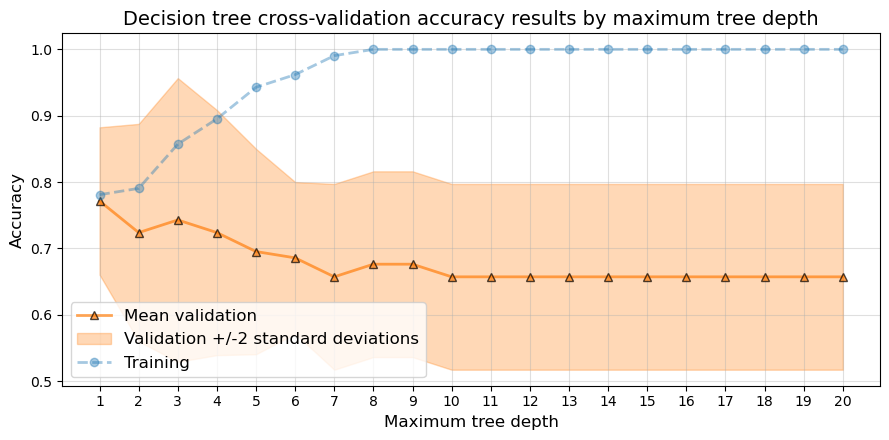

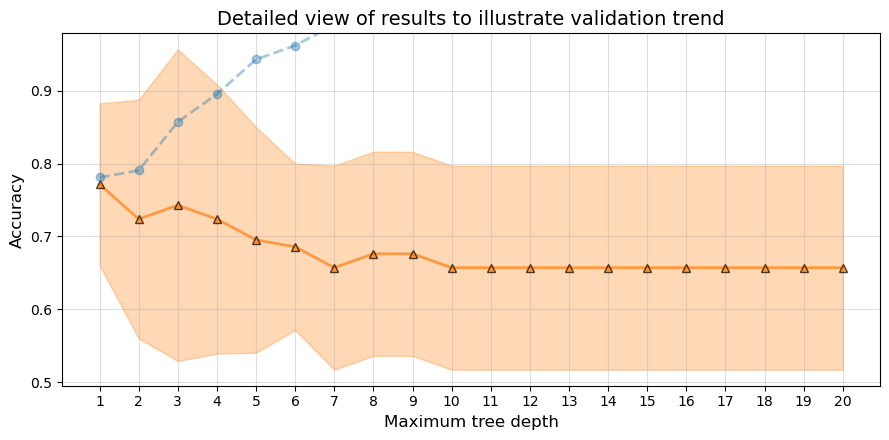

In [45]:
# convert results from lists to arrays for plotting function
cvmeans = np.array(cvmeans)
cvstds = np.array(cvstds)

# plot results as full plot
title = (
    "Decision tree cross-validation accuracy results by "
    "maximum tree depth"
)
plot_cv_results(
    depths,
    cvmeans,
    cvstds,
    train_scores,
    title,
    limit_y=False,
    show_legend=True,
)

# plot results with limited y-axis as required
title = (
    "Detailed view of results to illustrate validation trend"
)
plot_cv_results(
    depths,
    cvmeans,
    cvstds,
    train_scores,
    title,
    limit_y=True,
    show_legend=False,
)


In [46]:
#Identify the best depth by finding the max cross validation mean
best_tree_depth_index = np.argmax(cvmeans)
#Set the depth to the best depth
depth = depths[best_tree_depth_index]


In [47]:
#Fit a decision tree at the best depth 
dt_best_depth = DecisionTreeClassifier(max_depth=depth, random_state=42, class_weight='balanced')
dt_best_depth.fit(X_train_scaled_sub, y_train_sub)

#Predict from tree
dt_pred_train = dt_best_depth.predict(X_train_scaled_sub)
dt_pred_test = dt_best_depth.predict(X_test_scaled_sub)

dt_train_acc = dt_best_depth.score(X_train_scaled_sub, y_train_sub)
dt_test_acc = dt_best_depth.score(X_test_scaled_sub, y_test_sub)

dt_train_f1 = f1_score(y_train_sub, dt_pred_train)
dt_test_f1 = f1_score(y_test_sub, dt_pred_test)

In [48]:
new_row_data = {
    'Model': 'Decision Tree Best Depth = 2',
    'Train Accuracy Score': dt_train_acc,  
    'Test Accuracy Score': dt_test_acc,   
    'F1 Train Score': dt_train_f1,       
    'F1 Test Score': logistic_lasso_test_f1         
}
new_row_df = pd.DataFrame([new_row_data])
MODELS = pd.concat([MODELS, new_row_df], ignore_index=True)
display(MODELS)

,Model,Train Accuracy Score,Test Accuracy Score,F1 Train Score,F1 Test Score
0,Logistic Regression Naive,0.866667,0.777778,0.844444,0.750000
1,Logistic Regression Lasso Regularized,0.847619,0.800000,0.826087,0.769231
2,Decision Tree Best Depth = 2,0.780952,0.800000,0.772277,0.769231


## Third Model: Random Forest

In [49]:
#Fit a random forest model
n_trees = 100
tree_depth = 10
fitted_rf = RandomForestClassifier(
    n_estimators=n_trees, max_features="sqrt", max_depth=tree_depth, random_state=42, class_weight='balanced'
).fit(X_train_scaled_sub,y_train_sub)

# evaluate results
random_forest_train_score = fitted_rf.score(X_train_scaled_sub, y_train_sub) 
random_forest_test_score = fitted_rf.score(X_test_scaled_sub, y_test_sub)
rf_train_pred = fitted_rf.predict(X_train_scaled_sub)
rf_test_pred = fitted_rf.predict(X_test_scaled_sub)
f1_train_score = f1_score(y_train_sub, rf_train_pred)
f1_test_score = f1_score(y_test_sub, rf_test_pred)

In [50]:
new_row_data = {
    'Model': 'Baseline Random Forest',
    'Train Accuracy Score': random_forest_train_score,  
    'Test Accuracy Score': random_forest_test_score,   
    'F1 Train Score': f1_train_score,       
    'F1 Test Score': f1_test_score         
}
new_row_df = pd.DataFrame([new_row_data])
MODELS = pd.concat([MODELS, new_row_df], ignore_index=True)
display(MODELS)

,Model,Train Accuracy Score,Test Accuracy Score,F1 Train Score,F1 Test Score
0,Logistic Regression Naive,0.866667,0.777778,0.844444,0.750000
1,Logistic Regression Lasso Regularized,0.847619,0.800000,0.826087,0.769231
2,Decision Tree Best Depth = 2,0.780952,0.800000,0.772277,0.769231
3,Random Forest,1.000000,0.822222,1.000000,0.789474


In [51]:
#Random forest with tuning 
rf_tuned = GridSearchCV(estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
                  param_grid={'min_samples_split': [2,3,4,5,6,7],
                              'max_features': [2,3,4,5]},         
                  cv=5)
rf_tuned.fit(X_train_scaled_sub, y_train_sub)

best_max_features = rf_tuned.best_params_['max_features']
best_min_samples = rf_tuned.best_params_['min_samples_split']

In [52]:
rf_best_hyperparameters = RandomForestClassifier(random_state = 42, max_features=best_max_features, min_samples_split=best_min_samples, class_weight='balanced')
rf_tuned.fit(X_train_scaled_sub,y_train_sub)
rf_tuned_train_score = rf_tuned.score(X_train_scaled_sub, y_train_sub) 
rf_tuned_test_score = rf_tuned.score(X_test_scaled_sub, y_test_sub)
rf_train_pred = rf_tuned.predict(X_train_scaled_sub)
rf_test_pred = rf_tuned.predict(X_test_scaled_sub)
f1_rf_tune_train_score = f1_score(y_train_sub, rf_train_pred)
f1_rf_tune_test_score = f1_score(y_test_sub, rf_test_pred)

In [53]:
new_row_data = {
    'Model': 'Random Forest Tuned',
    'Train Accuracy Score': rf_tuned_train_score,  
    'Test Accuracy Score': rf_tuned_test_score,   
    'F1 Train Score': f1_rf_tune_train_score,       
    'F1 Test Score': f1_rf_tune_test_score         
}
new_row_df = pd.DataFrame([new_row_data])
MODELS = pd.concat([MODELS, new_row_df], ignore_index=True)
display(MODELS)

,Model,Train Accuracy Score,Test Accuracy Score,F1 Train Score,F1 Test Score
0,Logistic Regression Naive,0.866667,0.777778,0.844444,0.750000
1,Logistic Regression Lasso Regularized,0.847619,0.800000,0.826087,0.769231
2,Decision Tree Best Depth = 2,0.780952,0.800000,0.772277,0.769231
3,Random Forest,1.000000,0.822222,1.000000,0.789474
4,Random Forest Tuned,0.961905,0.844444,0.955556,0.810811


## Fourth Model: XGBoost with SMOTE

In [54]:
xgb_model = xgb.XGBClassifier()
parameters = {'max_depth':[1,2,3,4,5,6], 'n_estimators':[100,200,300], 'learning_rate': [0.1, 0.05,0.01, 0.001]}
clf = GridSearchCV(xgb_model, parameters, cv=5, n_jobs=-1)
clf.fit(X_train_scaled_sub, y_train_sub)

# print parameters of best model
print(clf.best_params_)

xgb_model = xgb.XGBClassifier(
    max_depth=clf.best_params_['max_depth'],
    n_estimators=clf.best_params_['n_estimators'],
    learning_rate=clf.best_params_['learning_rate'], random_state=42)

# Synthetic Minority Oversampling Technique (SMOTE)
sm = SMOTE(random_state=42)
X_train_scaled_sub_sm, y_train_sub_sm = sm.fit_resample(X_train_scaled_sub, y_train_sub)
xgb_model.fit(X_train_scaled_sub_sm, y_train_sub_sm)

xgb_train_score = xgb_model.score(X_train_scaled_sub, y_train_sub)
xgb_test_score = xgb_model.score(X_test_scaled_sub, y_test_sub)
y_train_pred = xgb_model.predict(X_train_scaled_sub)
y_test_pred = xgb_model.predict(X_test_scaled_sub)
f1_train_score = f1_score(y_train_sub, y_train_pred)
f1_test_score = f1_score(y_test_sub, y_test_pred)

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 200}


In [55]:
new_row_data = {
    'Model': 'XGBoost with SMOTE Tuned',
    'Train Accuracy Score': xgb_train_score,  
    'Test Accuracy Score': xgb_test_score,   
    'F1 Train Score': f1_train_score,       
    'F1 Test Score': f1_test_score         
}
new_row_df = pd.DataFrame([new_row_data])
MODELS = pd.concat([MODELS, new_row_df], ignore_index=True)
display(MODELS)

,Model,Train Accuracy Score,Test Accuracy Score,F1 Train Score,F1 Test Score
0,Logistic Regression Naive,0.866667,0.777778,0.844444,0.750000
1,Logistic Regression Lasso Regularized,0.847619,0.800000,0.826087,0.769231
2,Decision Tree Best Depth = 2,0.780952,0.800000,0.772277,0.769231
3,Random Forest,1.000000,0.822222,1.000000,0.789474
4,Random Forest Tuned,0.961905,0.844444,0.955556,0.810811
5,XGBoost with SMOTE Tuned,0.780952,0.800000,0.772277,0.790698


### Scan Level Models

## First Model: Logistic Regression Tuned

In [56]:
# Fit a logistic regression model with different options for the lambda hyperparameter
Cs = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
max_iter = 1000
penalty = "l1"
solver = "liblinear"

logistic_lasso = LogisticRegressionCV(Cs=Cs,
                                   cv=5, # low cv value because our data set is small
                                   penalty=penalty,
                                   max_iter=max_iter,
                                   solver=solver,
                                   random_state=42,
                                    class_weight='balanced'
)

logistic_lasso = logistic_lasso.fit(X_train_scaled_mri, y_train_mri)

y_pred_train_logistic_lasso = logistic_lasso.predict(X_train_scaled_mri)
y_pred_test_logistic_lasso = logistic_lasso.predict(X_test_scaled_mri)

logistic_lasso_train_f1 = f1_score(y_train_mri, y_pred_train_logistic_lasso)
logistic_lasso_test_f1 = f1_score(y_test_mri, y_pred_test_logistic_lasso)

logistic_lasso_train_acc = logistic_lasso.score(X_train_scaled_mri, y_train_mri) 
logistic_lasso_test_acc = logistic_lasso.score(X_test_scaled_mri, y_test_mri)


In [57]:
new_row_data = {
    'Model': 'Logistic Tuned',
    'Train Accuracy Score': logistic_lasso_train_acc,  
    'Test Accuracy Score': logistic_lasso_test_acc,   
    'F1 Train Score': logistic_lasso_train_f1,       
    'F1 Test Score': logistic_lasso_test_f1         
}
new_row_df = pd.DataFrame([new_row_data])
MODELS_mri = pd.concat([MODELS_mri, new_row_df], ignore_index=True)
display(MODELS_mri)

,Model,Train Accuracy Score,Test Accuracy Score,F1 Train Score,F1 Test Score
0,Logistic Regression Naive,0.872587,0.821429,0.817680,0.787234
1,Logistic Tuned,0.872587,0.812500,0.815642,0.774194


## Second Model: Decision Tree

In [58]:
depths = list(range(1, 21))
cv = 5
cvmeans = []
cvstds = []
train_scores = []

for depth in depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=42, class_weight='balanced')
    train_scores.append(dt_clf.fit(X_train_scaled_mri, y_train_mri).score(X_train_scaled_mri, y_train_mri))

    scores = cross_val_score(estimator=dt_clf, X=X_train_scaled_mri, y=y_train_mri, cv=cv)
    cvmeans.append(scores.mean())
    cvstds.append(scores.std())

In [59]:
best_tree_depth_index = np.argmax(cvmeans)
depth = depths[best_tree_depth_index]

In [60]:
dt_best_depth = DecisionTreeClassifier(max_depth=depth, random_state=42)
dt_best_depth.fit(X_train_scaled_mri, y_train_mri)

dt_pred_train = dt_best_depth.predict(X_train_scaled_mri)
dt_pred_test = dt_best_depth.predict(X_test_scaled_mri)

dt_train_acc = dt_best_depth.score(X_train_scaled_mri, y_train_mri)
dt_test_acc = dt_best_depth.score(X_test_scaled_mri, y_test_mri)

dt_train_f1 = f1_score(y_train_mri, dt_pred_train)
dt_test_f1 = f1_score(y_test_mri, dt_pred_test)

In [61]:
new_row_data = {
    'Model': 'Decision Tree Best Depth',
    'Train Accuracy Score': dt_train_acc,  
    'Test Accuracy Score': dt_test_acc,   
    'F1 Train Score': dt_train_f1,       
    'F1 Test Score': dt_test_f1         
}
new_row_df = pd.DataFrame([new_row_data])
MODELS_mri = pd.concat([MODELS_mri, new_row_df], ignore_index=True)
display(MODELS_mri)

,Model,Train Accuracy Score,Test Accuracy Score,F1 Train Score,F1 Test Score
0,Logistic Regression Naive,0.872587,0.821429,0.817680,0.787234
1,Logistic Tuned,0.872587,0.812500,0.815642,0.774194
2,Decision Tree Best Depth,0.853282,0.830357,0.786517,0.781609


## Third Model Random Forest

In [62]:
# Use cross validation to find the best hyper parameters for the random forest
rf_tuned = GridSearchCV(estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
                  param_grid={'min_samples_split': [2,3,4,5,6,7,8,9,10],
                              'max_features': [2,3,4,5]},         
                  cv=5)
rf_tuned.fit(X_train_scaled_mri, y_train_mri)

best_max_features = rf_tuned.best_params_['max_features']
best_min_samples = rf_tuned.best_params_['min_samples_split']

In [63]:
rf_best_hyperparameters = RandomForestClassifier(random_state = 42, max_features=best_max_features, min_samples_split=best_min_samples, class_weight='balanced')

rf_best_hyperparameters.fit(X_train_scaled_mri,y_train_mri)
rf_tuned_train_score = rf_best_hyperparameters.score(X_train_scaled_mri, y_train_mri) 
rf_tuned_test_score = rf_best_hyperparameters.score(X_test_scaled_mri, y_test_mri)

rf_train_pred = rf_best_hyperparameters.predict(X_train_scaled_mri)
rf_test_pred = rf_best_hyperparameters.predict(X_test_scaled_mri)

f1_rf_tune_train_score = f1_score(y_train_mri, rf_train_pred)
f1_rf_tune_test_score = f1_score(y_test_mri, rf_test_pred)

In [64]:
new_row_data = {
    'Model': 'Random Forest Tuned Best Hyperparameters',
    'Train Accuracy Score': rf_tuned_train_score,  
    'Test Accuracy Score': rf_tuned_test_score,   
    'F1 Train Score': f1_rf_tune_train_score,       
    'F1 Test Score': f1_rf_tune_test_score         
}
new_row_df = pd.DataFrame([new_row_data])
MODELS_mri = pd.concat([MODELS_mri, new_row_df], ignore_index=True)
display(MODELS_mri)

,Model,Train Accuracy Score,Test Accuracy Score,F1 Train Score,F1 Test Score
0,Logistic Regression Naive,0.872587,0.821429,0.817680,0.787234
1,Logistic Tuned,0.872587,0.812500,0.815642,0.774194
2,Decision Tree Best Depth,0.853282,0.830357,0.786517,0.781609
3,Random Forest Tuned Best Hyperparameters,0.996139,0.857143,0.994872,0.822222


## Fourth Model: XGBoost 

In [67]:
xgb_model = xgb.XGBClassifier()
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12], 'n_estimators':[600,700,800,900,1000], 'learning_rate': [0.25, 0.2, 0.15, 0.1, 0.05, 0.01, 0.001]}
clf = GridSearchCV(xgb_model, parameters, cv=5, n_jobs=-1)
clf.fit(X_train_scaled_mri, y_train_mri)

print(clf.best_params_)

xgb_model = xgb.XGBClassifier(
    max_depth=clf.best_params_['max_depth'],
    n_estimators=clf.best_params_['n_estimators'],
    learning_rate=clf.best_params_['learning_rate'], random_state=42)

xgb_model.fit(X_train_scaled_mri, y_train_mri)

xgb_train_score = xgb_model.score(X_train_scaled_mri, y_train_mri)
xgb_test_score = xgb_model.score(X_test_scaled_mri, y_test_mri)
y_train_pred = xgb_model.predict(X_train_scaled_mri)
y_test_pred = xgb_model.predict(X_test_scaled_mri)
f1_train_score = f1_score(y_train_mri, y_train_pred)
f1_test_score = f1_score(y_test_mri, y_test_pred)

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 1000}


In [68]:
new_row_data = {
    'Model': 'Tuned XGBoost',
    'Train Accuracy Score': xgb_train_score,  
    'Test Accuracy Score': xgb_test_score,   
    'F1 Train Score': f1_train_score,       
    'F1 Test Score': f1_test_score         
}
new_row_df = pd.DataFrame([new_row_data])
MODELS_mri = pd.concat([MODELS_mri, new_row_df], ignore_index=True)
display(MODELS_mri)

,Model,Train Accuracy Score,Test Accuracy Score,F1 Train Score,F1 Test Score
0,Logistic Regression Naive,0.872587,0.821429,0.817680,0.787234
1,Logistic Tuned,0.872587,0.812500,0.815642,0.774194
2,Decision Tree Best Depth,0.853282,0.830357,0.786517,0.781609
3,Random Forest Tuned Best Hyperparameters,0.996139,0.857143,0.994872,0.822222
4,XGBoost with SMOTE Tuned,0.938224,0.803571,0.915789,0.765957
5,XGBoost with SMOTE Tuned,0.942085,0.830357,0.919786,0.795699


## Fifth Model: XGBoost with SMOTE

In [69]:
# Synthetic Minority Oversampling Technique (SMOTE)
sm = SMOTE(random_state=42)
X_train_scaled_mri_sm, y_train_mri_sm = sm.fit_resample(X_train_scaled_mri, y_train_mri)
xgb_model.fit(X_train_scaled_mri_sm, y_train_mri_sm)

xgb_train_score = xgb_model.score(X_train_scaled_mri, y_train_mri)
xgb_test_score = xgb_model.score(X_test_scaled_mri, y_test_mri)
y_train_pred = xgb_model.predict(X_train_scaled_mri)
y_test_pred = xgb_model.predict(X_test_scaled_mri)
f1_train_score = f1_score(y_train_mri, y_train_pred)
f1_test_score = f1_score(y_test_mri, y_test_pred)

In [70]:
new_row_data = {
    'Model': 'XGBoost with SMOTE Tuned',
    'Train Accuracy Score': xgb_train_score,  
    'Test Accuracy Score': xgb_test_score,   
    'F1 Train Score': f1_train_score,       
    'F1 Test Score': f1_test_score         
}
new_row_df = pd.DataFrame([new_row_data])
MODELS_mri = pd.concat([MODELS_mri, new_row_df], ignore_index=True)
display(MODELS_mri)

,Model,Train Accuracy Score,Test Accuracy Score,F1 Train Score,F1 Test Score
0,Logistic Regression Naive,0.872587,0.821429,0.817680,0.787234
1,Logistic Tuned,0.872587,0.812500,0.815642,0.774194
2,Decision Tree Best Depth,0.853282,0.830357,0.786517,0.781609
3,Random Forest Tuned Best Hyperparameters,0.996139,0.857143,0.994872,0.822222
4,XGBoost with SMOTE Tuned,0.938224,0.803571,0.915789,0.765957
5,XGBoost with SMOTE Tuned,0.942085,0.830357,0.919786,0.795699
6,XGBoost with SMOTE Tuned,0.938224,0.803571,0.915789,0.765957
